# Session 5

Simone Mistrali

ID:2119119

## A) Likelihood

The appropiate likelihood is the binomial distribution, because we sample from a random sample of people and every possible person on the sample of a given size has an equal probability of selection.  


We can write the binomial function as follow $y$ =number of people in the sample who read the journal, $n$ length of the sample, $r$ probability that a person reads the journal and $\mathcal{M}$ is the model.
$$
\mathcal{P}(y|r,n,\mathcal{M})=\binom{n}{y}r^y(1-r)^{n-y}
$$


## B) Posterior

Given a uniform prior ($\mathcal{P}(r|\mathcal{M}) \sim \mathcal{U}(0,1))$ the posterior is proportional to the multiplication between the prior and the likelihood:

$$
\mathcal{P}(r|y,n,\mathcal{M}) \propto \mathcal{P}(y|r,n,\mathcal{M})\mathcal{P}(r|\mathcal{M})\\
\mathcal{P}(r|y,n,\mathcal{M})\propto r^y(1-r)^{n-y}
$$

If we want an equal to and not a "prop to" we need to normalize the $\mathcal{P}(r|y,n,\mathcal{M})$ by the evidence ($\mathcal{P}(y|n,\mathcal{M})=\mathcal{P}^*$)

In [13]:
n <- 150 
y <- 29

x <- seq(0, 150, 1)

p.likelihood <- dbinom(x=29, size=n, prob=p)


n.sample <- 10000
# To evalute the integral
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)

p.star <- dbinom(x=y, size=n, prob=p)
p.norm <- p.star/(delta.p*sum(p.star))

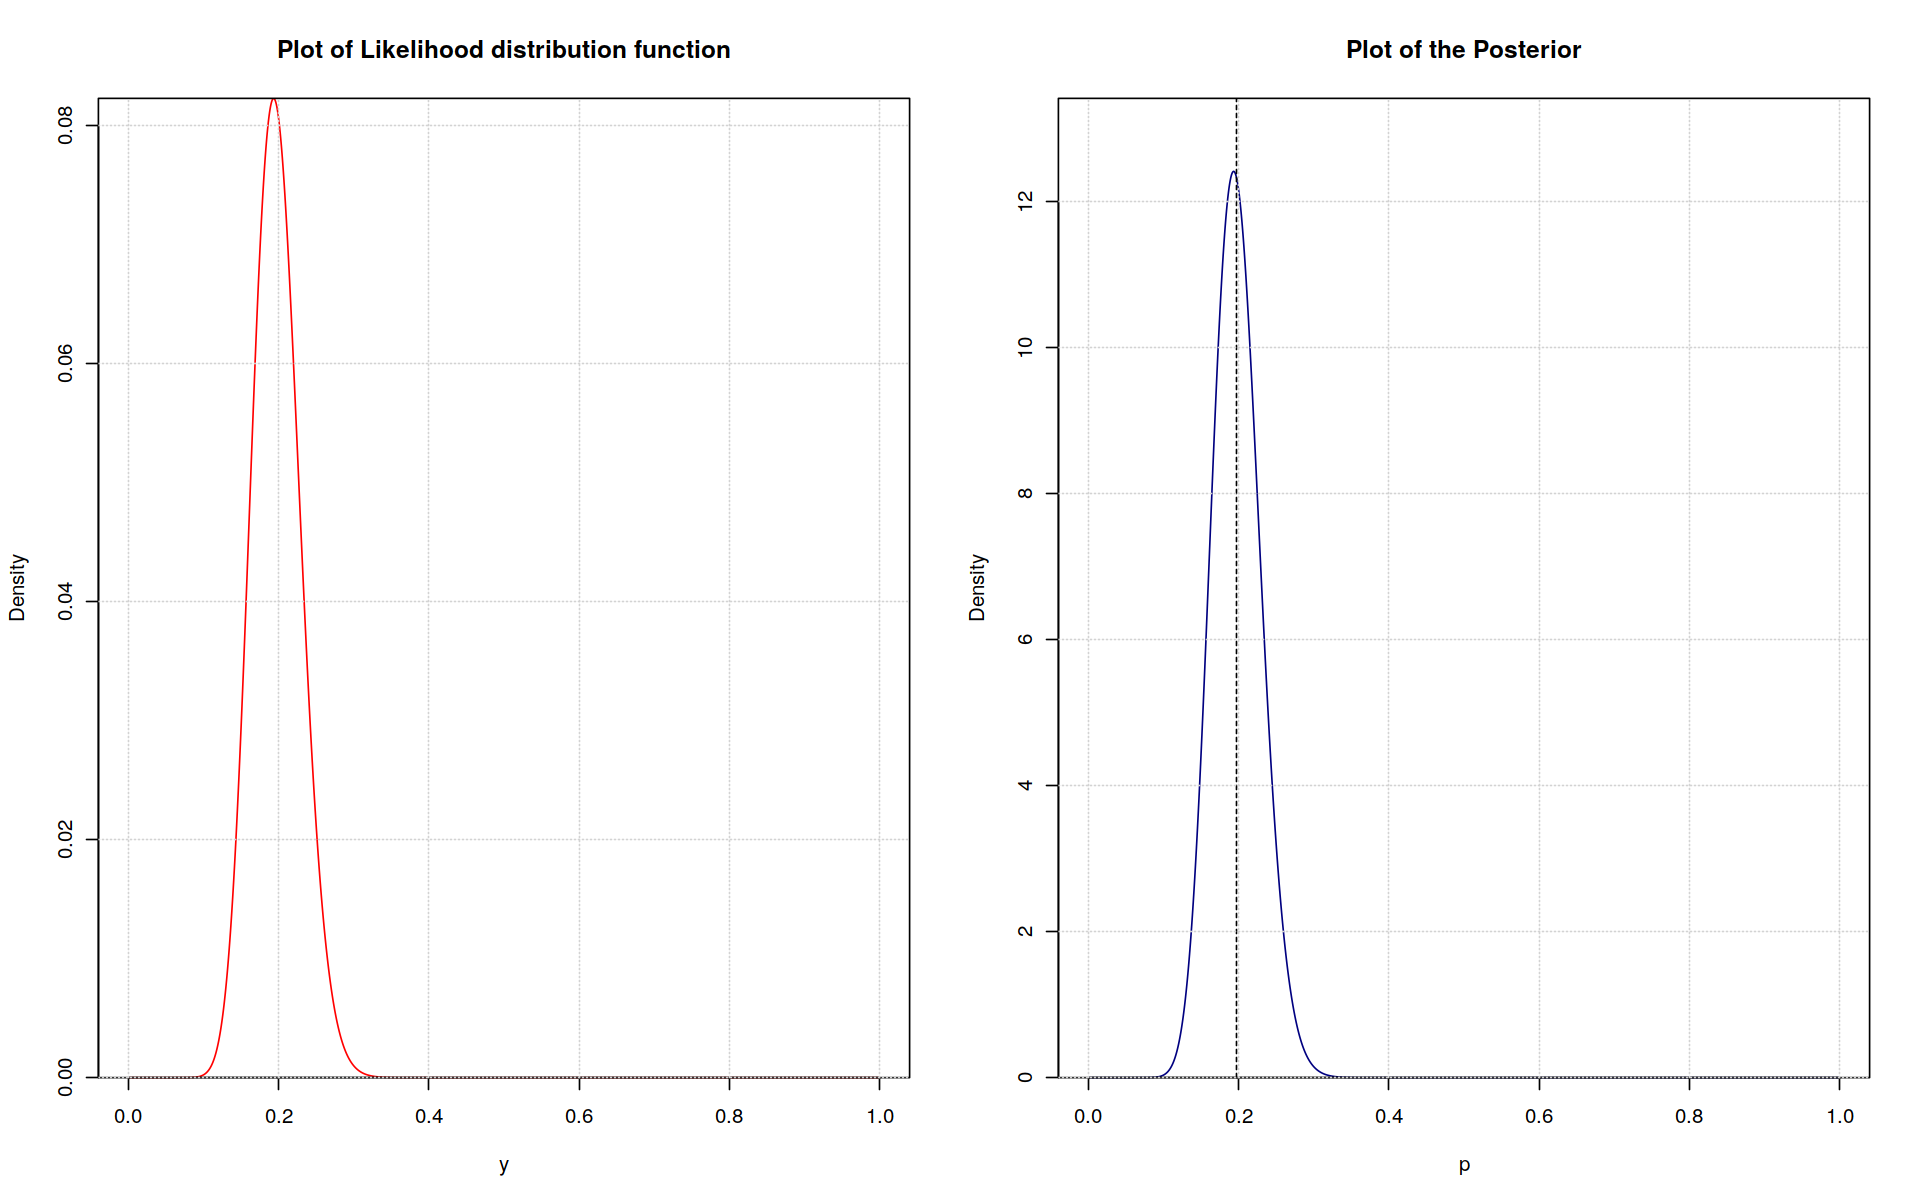

In [14]:
par(mfrow=c(1,2))
options(repr.plot.width=16, repr.plot.height=10)

plot(p, p.likelihood, xaxs='r', yaxs='i', col='red', type='l',
     main = "Plot of Likelihood distribution function", xlab="y", 
     ylab='Density')

grid()

plot(p, p.norm, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(p.norm)+1),
     , xlab="p",main="Plot of the Posterior", 
     ylab='Density')
p.mean <- delta.p*sum(p*p.norm)
abline(v=p.mean, lty=2,col='black')
grid()

# Ex 2

We have to buid up $3$ different posterior:
- Anna's one is a $\beta(\alpha^*,\beta^*)$ s.t. $\mu=\dfrac{\alpha^*}{\alpha^*+\beta^*}=0.2$ , $\sigma=\dfrac{\alpha^* \beta^*}{(\alpha^*+\beta^*)^2(\alpha^*+\beta^*+1)}=0.08$.
- Benny's is a uniform prior $\mathcal{U}(0,1)$.
- Chris's prior have trapezoidal one.

The parameters for Anna's prior are found using this formulae:
$$
\begin{cases}
\nu = \alpha^* + \beta^*=\frac{\mu(1-\mu)}{\sigma}-1\\
\alpha^* = \mu \nu =\mu\left( \frac{\mu(1-\mu)}{\sigma}-1\right)\\
\beta^*  = \left(1-\mu \right)\nu =\left(1-\mu \right)\left( \frac{\mu(1-\mu)}{\sigma}-1\right)
\end{cases}
$$

In [72]:
f <- function(x){
    ifelse(x>=0 & x<0.1, 20*x,
           ifelse(x>=0.1 & x<0.3 ,2, 
                 ifelse(x>=0.3 & x<0.5, 5-10*x,0 )))
}

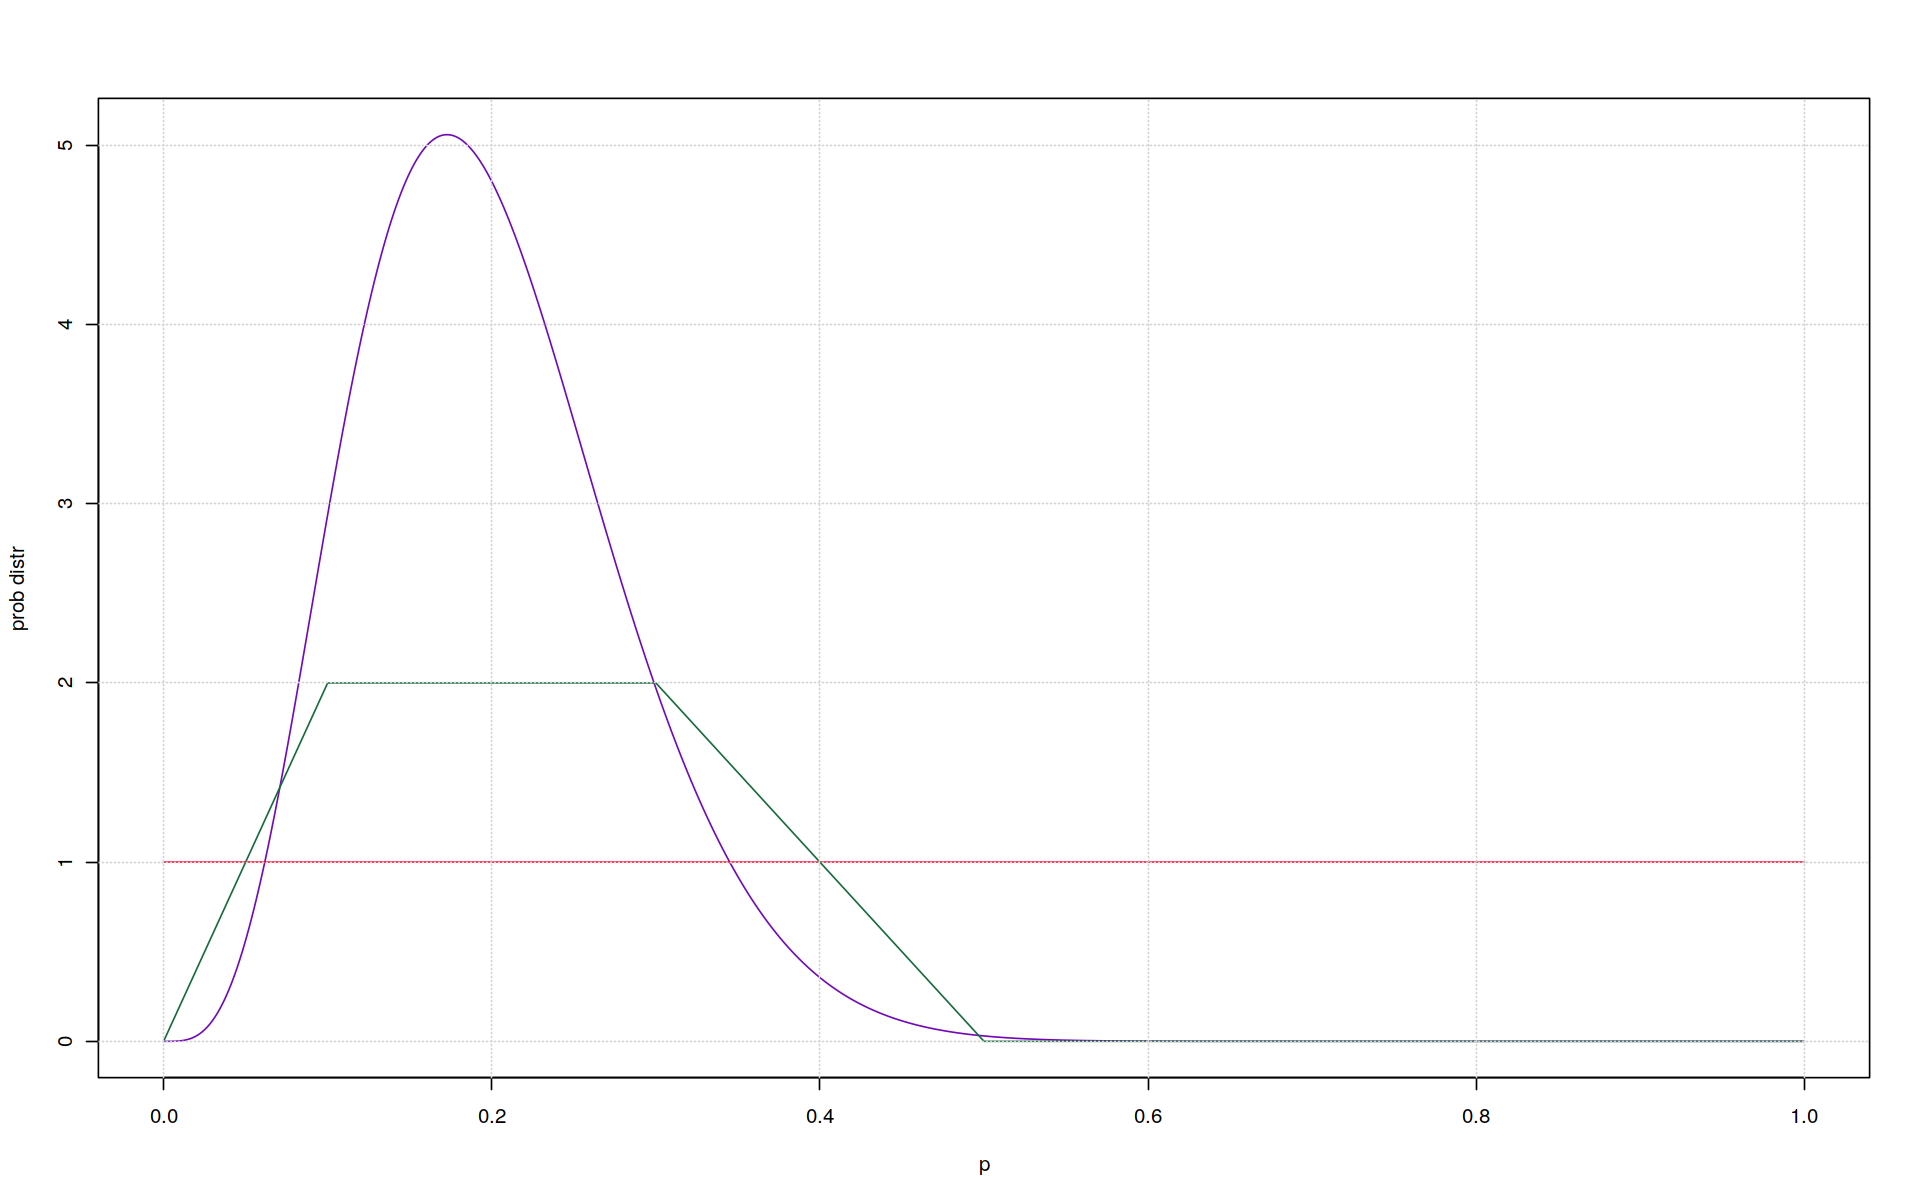

In [73]:
nu <- 0.2*(0.8)/0.08^2 -1
alpha <- nu*0.2
beta <- (0.8)*nu
n.sample <- 2000


p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)
options(repr.plot.width=16, repr.plot.height=10)
Anna.p <-dbeta(p,shape1=alpha,shape2=beta)
Benny.p <- dunif(p)
Chris.p <-f(p)
plot(p,dbeta(p,shape1=alpha,shape2=beta),type='l',col='#7209B7',ylab='prob distr')
lines(p,dunif(p),type='l',col='#FF0035')
lines(p,f(p),col='#146B3A')
grid()

The three students decide to interview a sample of 100 citizens of the small town,
asking for their opinion. Out of the interviewed sample, 26 support the building of the new concert
hall. In this case the likelihood is a binomial one, because the people agree or disagree to build the concert hall.
$$
posterior\propto likelihood \times prior
$$

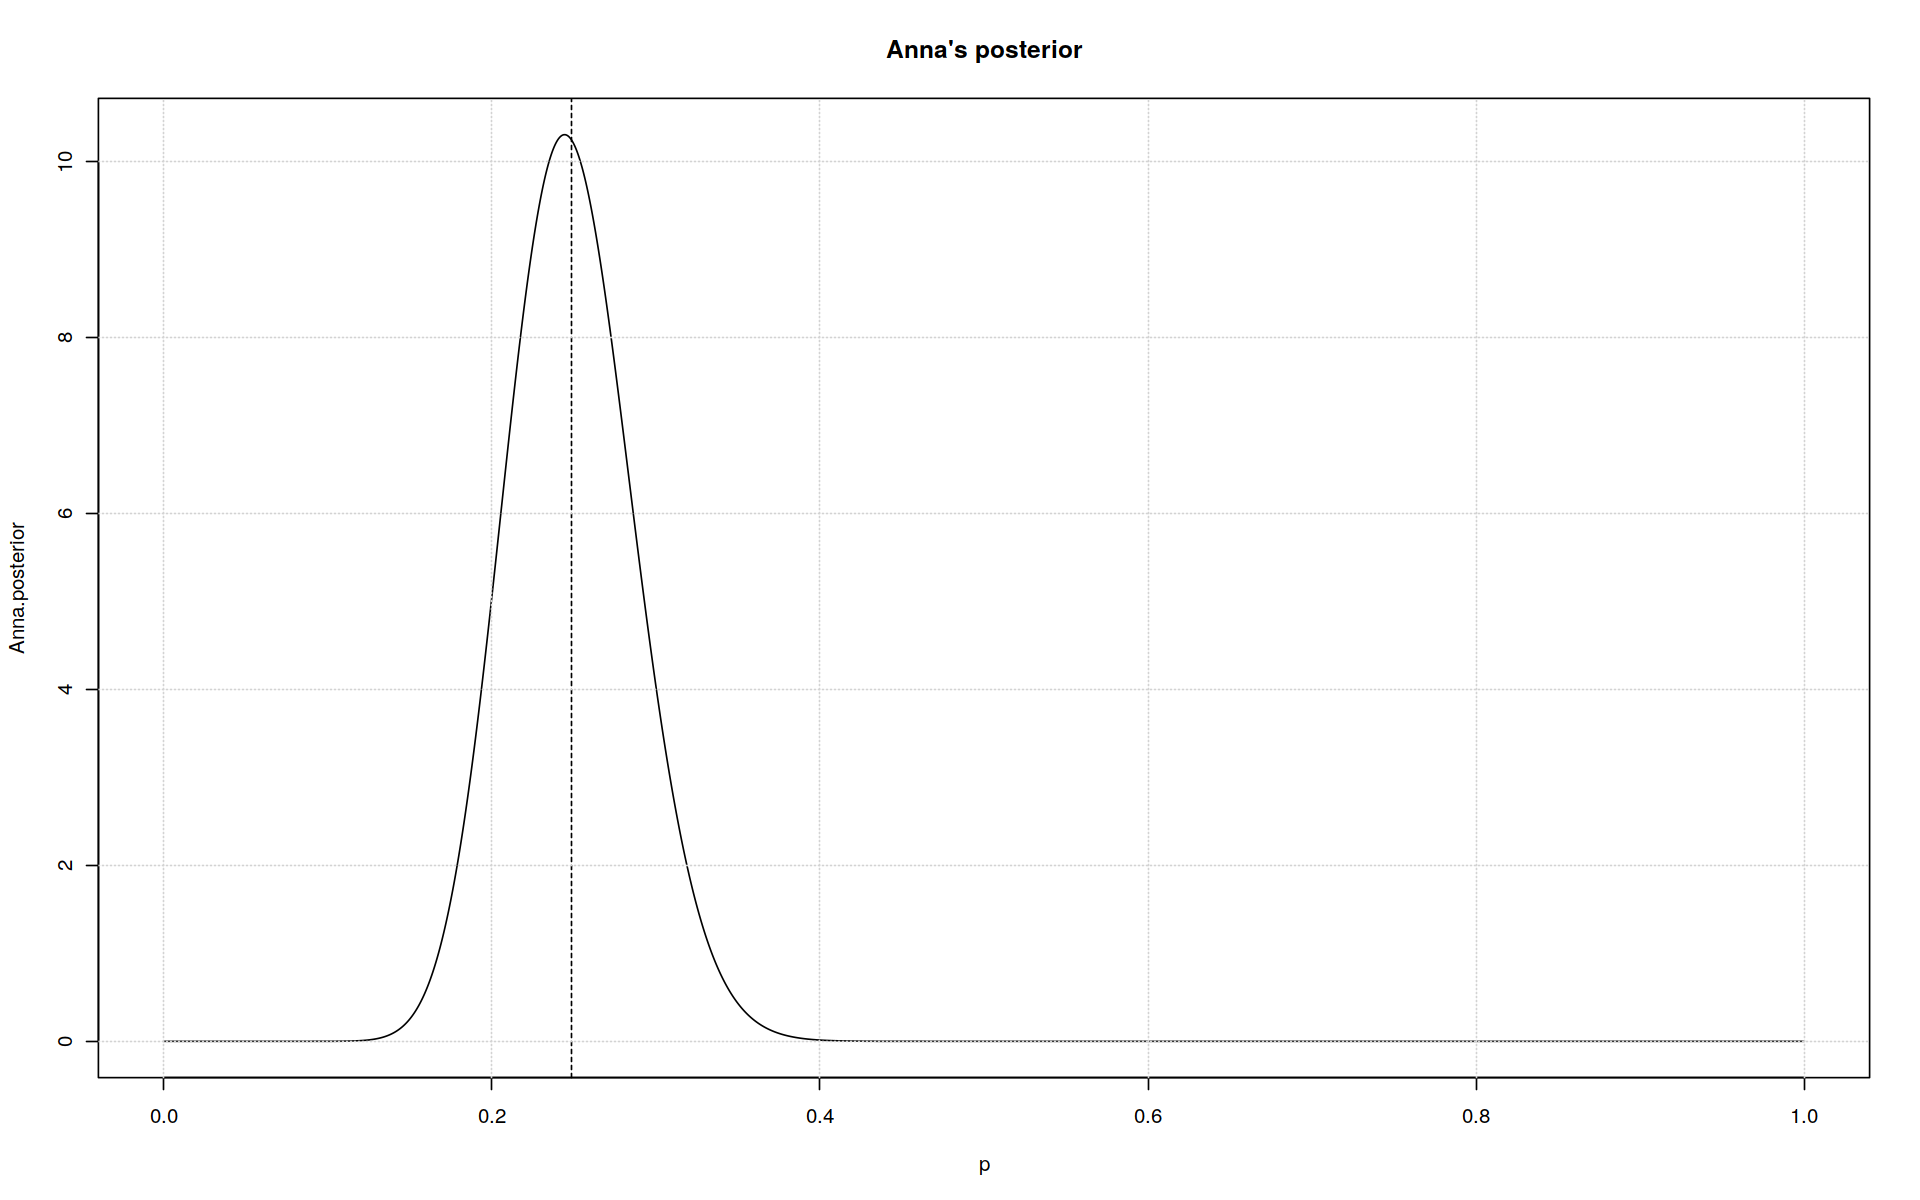

In [74]:
n <- 100 
y <- 26
n.sample <- 100000
# To evaluate the integral
dp <- 1/n.sample

p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)

p.likelihood <- dbinom(x=y, size=n, prob=p)
Anna.p <-dbeta(p,shape1=alpha,shape2=beta)
Anna.posterior<- p.likelihood*Anna.p 

Anna.posterior <- Anna.posterior/(sum(dp*Anna.posterior))

plot(p,Anna.posterior,type = 'l',main="Anna's posterior")
p.Amean <- dp*sum(p*Anna.posterior)
abline(v=p.Amean, lty=2,col='black')
grid()

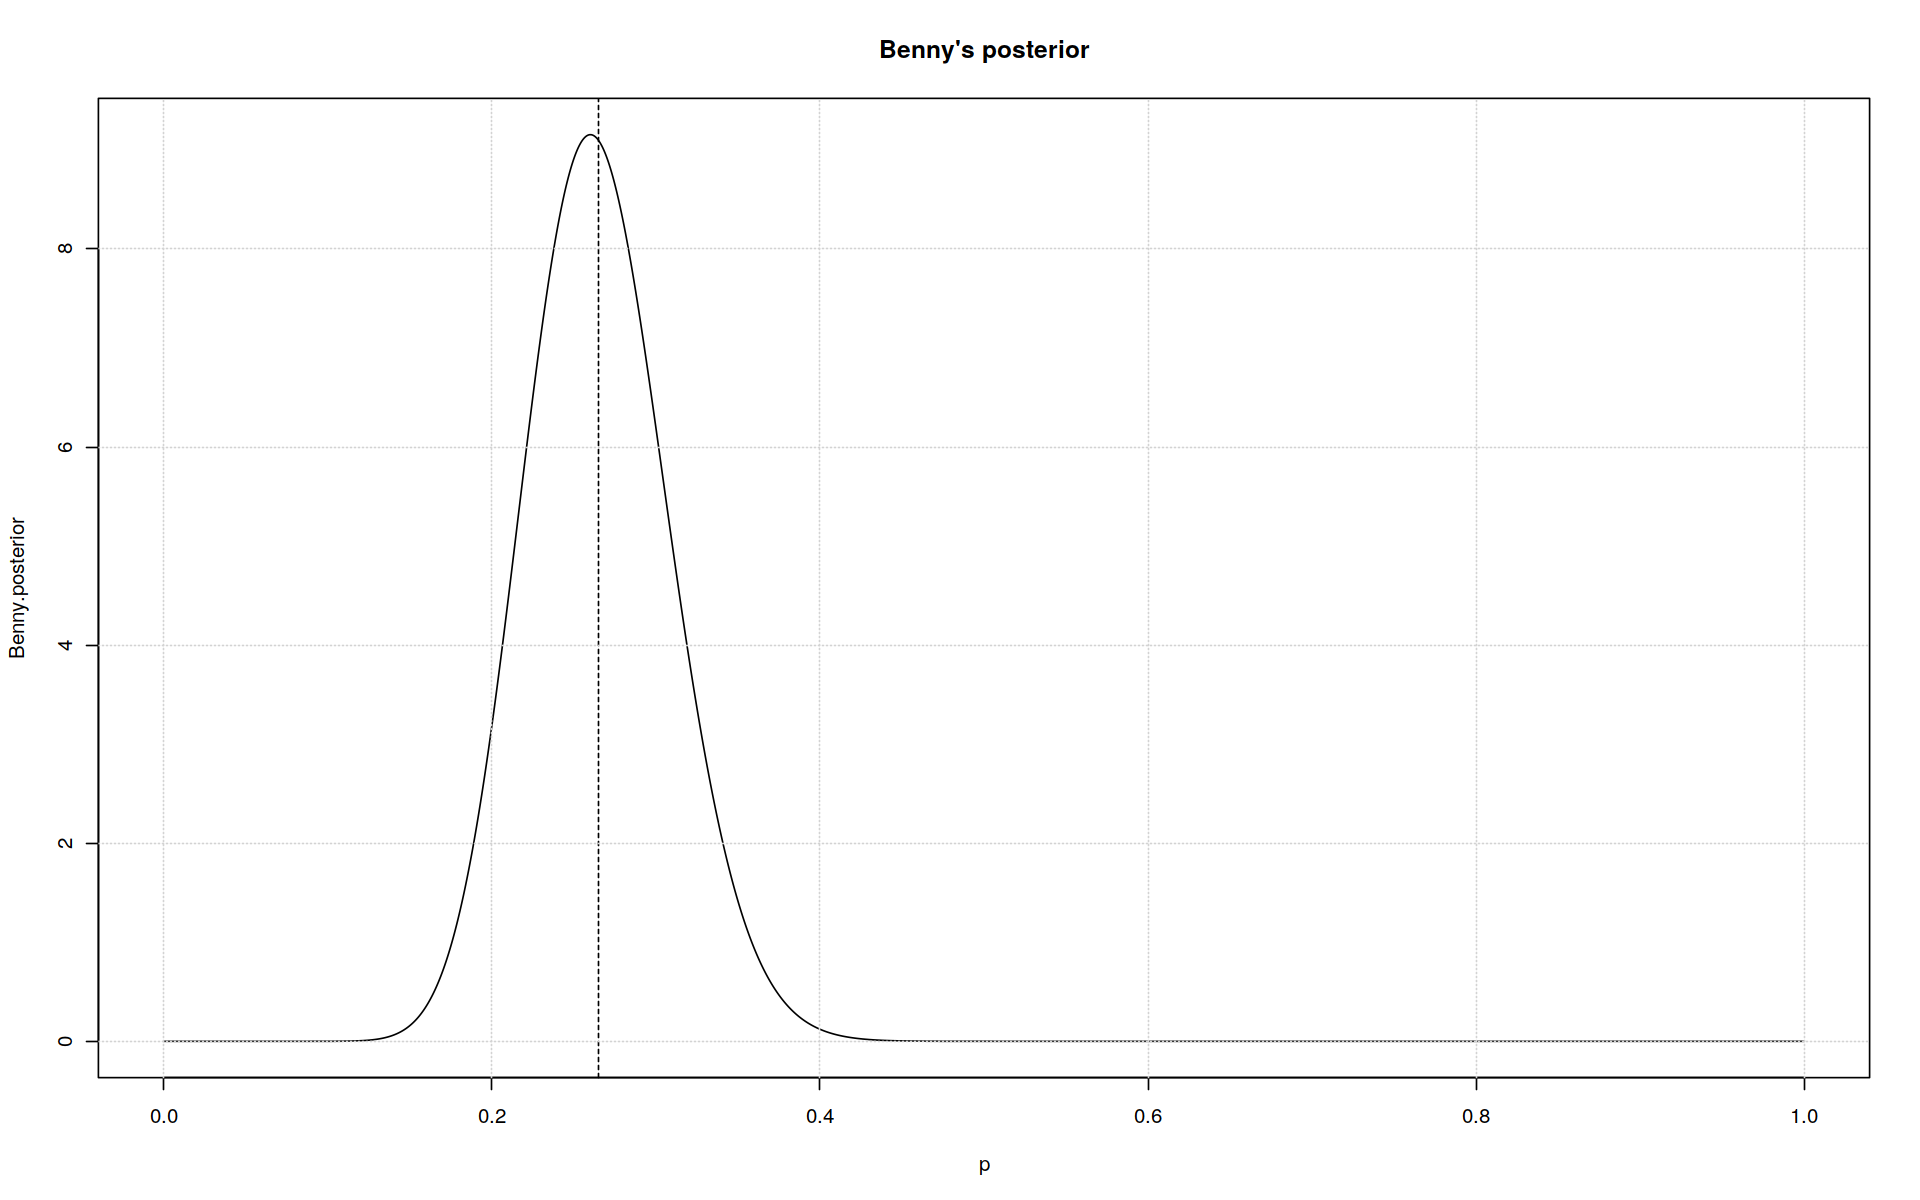

In [75]:

n.sample <- 100000
# To evaluate the integral
dp <- 1/n.sample

p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)

p.likelihood <- dbinom(x=y, size=n, prob=p)
Benny.p <-dunif(p)
Benny.posterior<- p.likelihood*Benny.p 

Benny.posterior <- Benny.posterior/(sum(dp*Benny.posterior))

plot(p,Benny.posterior,type = 'l',main="Benny's posterior")
p.Bmean <- dp*sum(p*Benny.posterior)
abline(v=p.Bmean, lty=2,col='black')
grid()

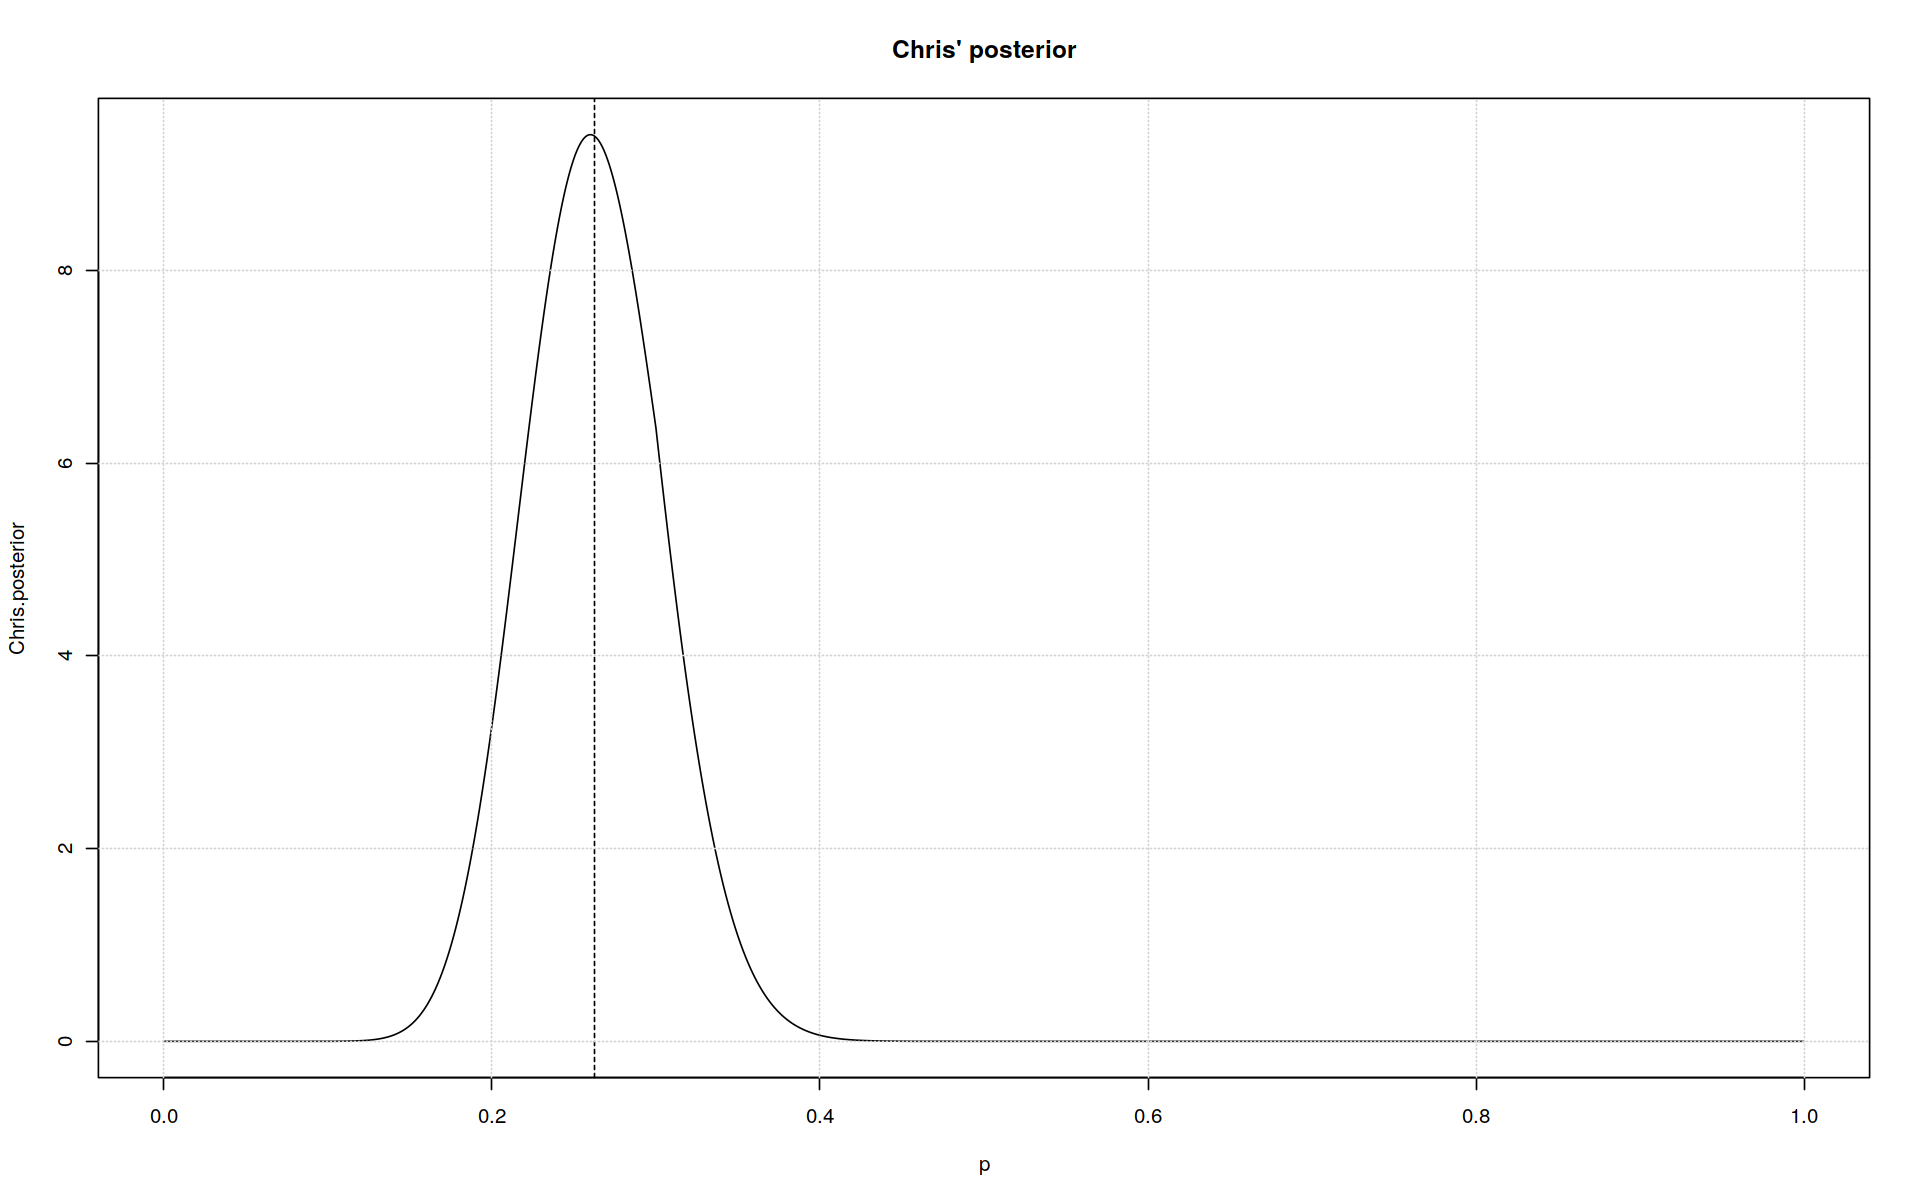

In [76]:

n.sample <- 100000
# To evaluate the integral
dp <- 1/n.sample

p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)

p.likelihood <- dbinom(x=y, size=n, prob=p)
Chris.p <-f(p)
Chris.posterior<- p.likelihood*Chris.p 

Chris.posterior <- Chris.posterior/(sum(dp*Chris.posterior))

plot(p,Chris.posterior,type = 'l',main="Chris' posterior")
p.Cmean <- dp*sum(p*Chris.posterior)
abline(v=p.Cmean, lty=2,col='black')
grid()

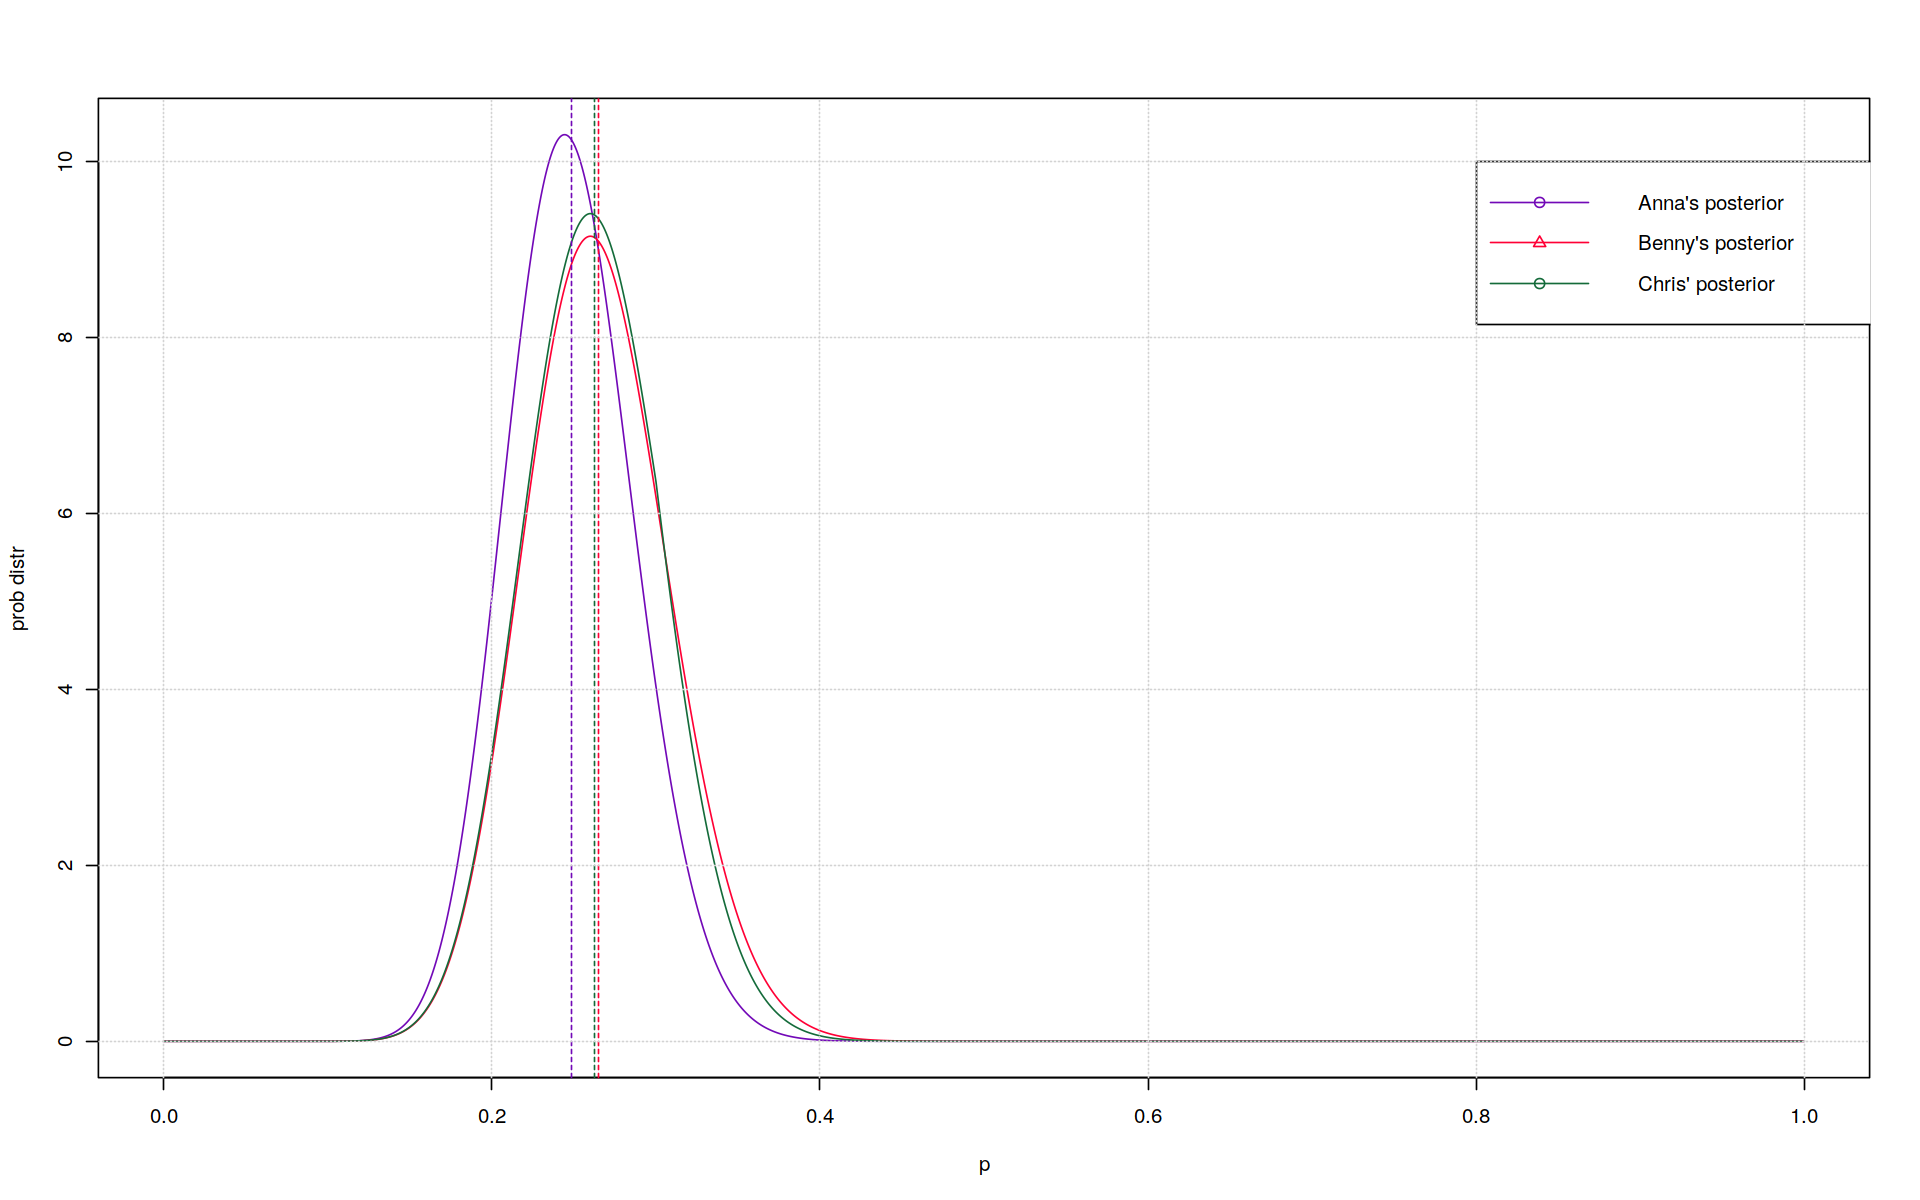

In [77]:
n.sample <-100000
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)

plot(p,Anna.posterior,type = 'l',,col='#7209B7',ylab='prob distr')
lines(p,Benny.posterior,col='#FF0035')
lines(p,Chris.posterior,col='#146B3A')
abline(v=p.Amean, lty=2,col='#7209B7')
abline(v=p.Bmean, lty=2,col='#FF0035')
abline(v=p.Cmean, lty=2,col='#146B3A')
legend(x=.8,y=10,legend = c("Anna's posterior","Benny's posterior","Chris' posterior"),
       col=c('#7209B7','#FF0035','#146B3A'),pch=c(1,2),cex=1,lty=c(1,1,1))
grid()

In [78]:

anna.area <- dp*cumsum(Anna.posterior)
benny.area <- dp*cumsum(Benny.posterior)
chris.area <- dp*cumsum(Chris.posterior)

conf.level = 0.95 
conf.level.func <- function(p,cumsum.area,conf.level) {
            for(i in 1:(length(cumsum.area)-1)){
                c1 <- (1-conf.level)/2
                c2 <- conf.level+(1-conf.level)/2
                if ( (cumsum.area[i+1]>= c1) & (cumsum.area[i] <= c1)) {
                    x1 <- (p[i]+p[i+1])/2
                }
                if ( (cumsum.area[i+1]>= c2) & (cumsum.area[i] <= c2)) {
                    x2 <- (p[i]+p[i+1])/2
                }            
            }
            return(c(x1,x2))
           }
x.anna <- conf.level.func(p,anna.area,conf.level)
x.benny <- conf.level.func(p,benny.area,conf.level)
x.chris <- conf.level.func(p,chris.area,conf.level)
print(paste0("Anna Prior Conf interval of 95%: [", x.anna[1],",", x.anna[2],"]"))
print(paste0("Benny Prior Conf interval of 95%: [", x.benny[1],",", x.benny[2],"]"))
print(paste0("Chris Prior Conf interval of 95%: [", x.chris[1],",", x.chris[2],"]"))

[1] "Anna Prior Conf interval of 95%: [0.17668,0.32777]"
[1] "Benny Prior Conf interval of 95%: [0.18413,0.35401]"
[1] "Chris Prior Conf interval of 95%: [0.1837,0.34611]"


# Ex 3

In [15]:
coin_t <- c(0,0,0,0,0,1,0,0,1,1,0,0,1,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,1,1)
r <- length(coin_t[coin_t == 1]) # Number of heads

In [28]:
n.sample <- 10000
dp <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample) 

# Flat Prior
flat.prior <- dunif(x=p)

# Beta Prior
alpha <- 8
beta <- 8
beta.prior <- dbeta(x=p, alpha, beta)

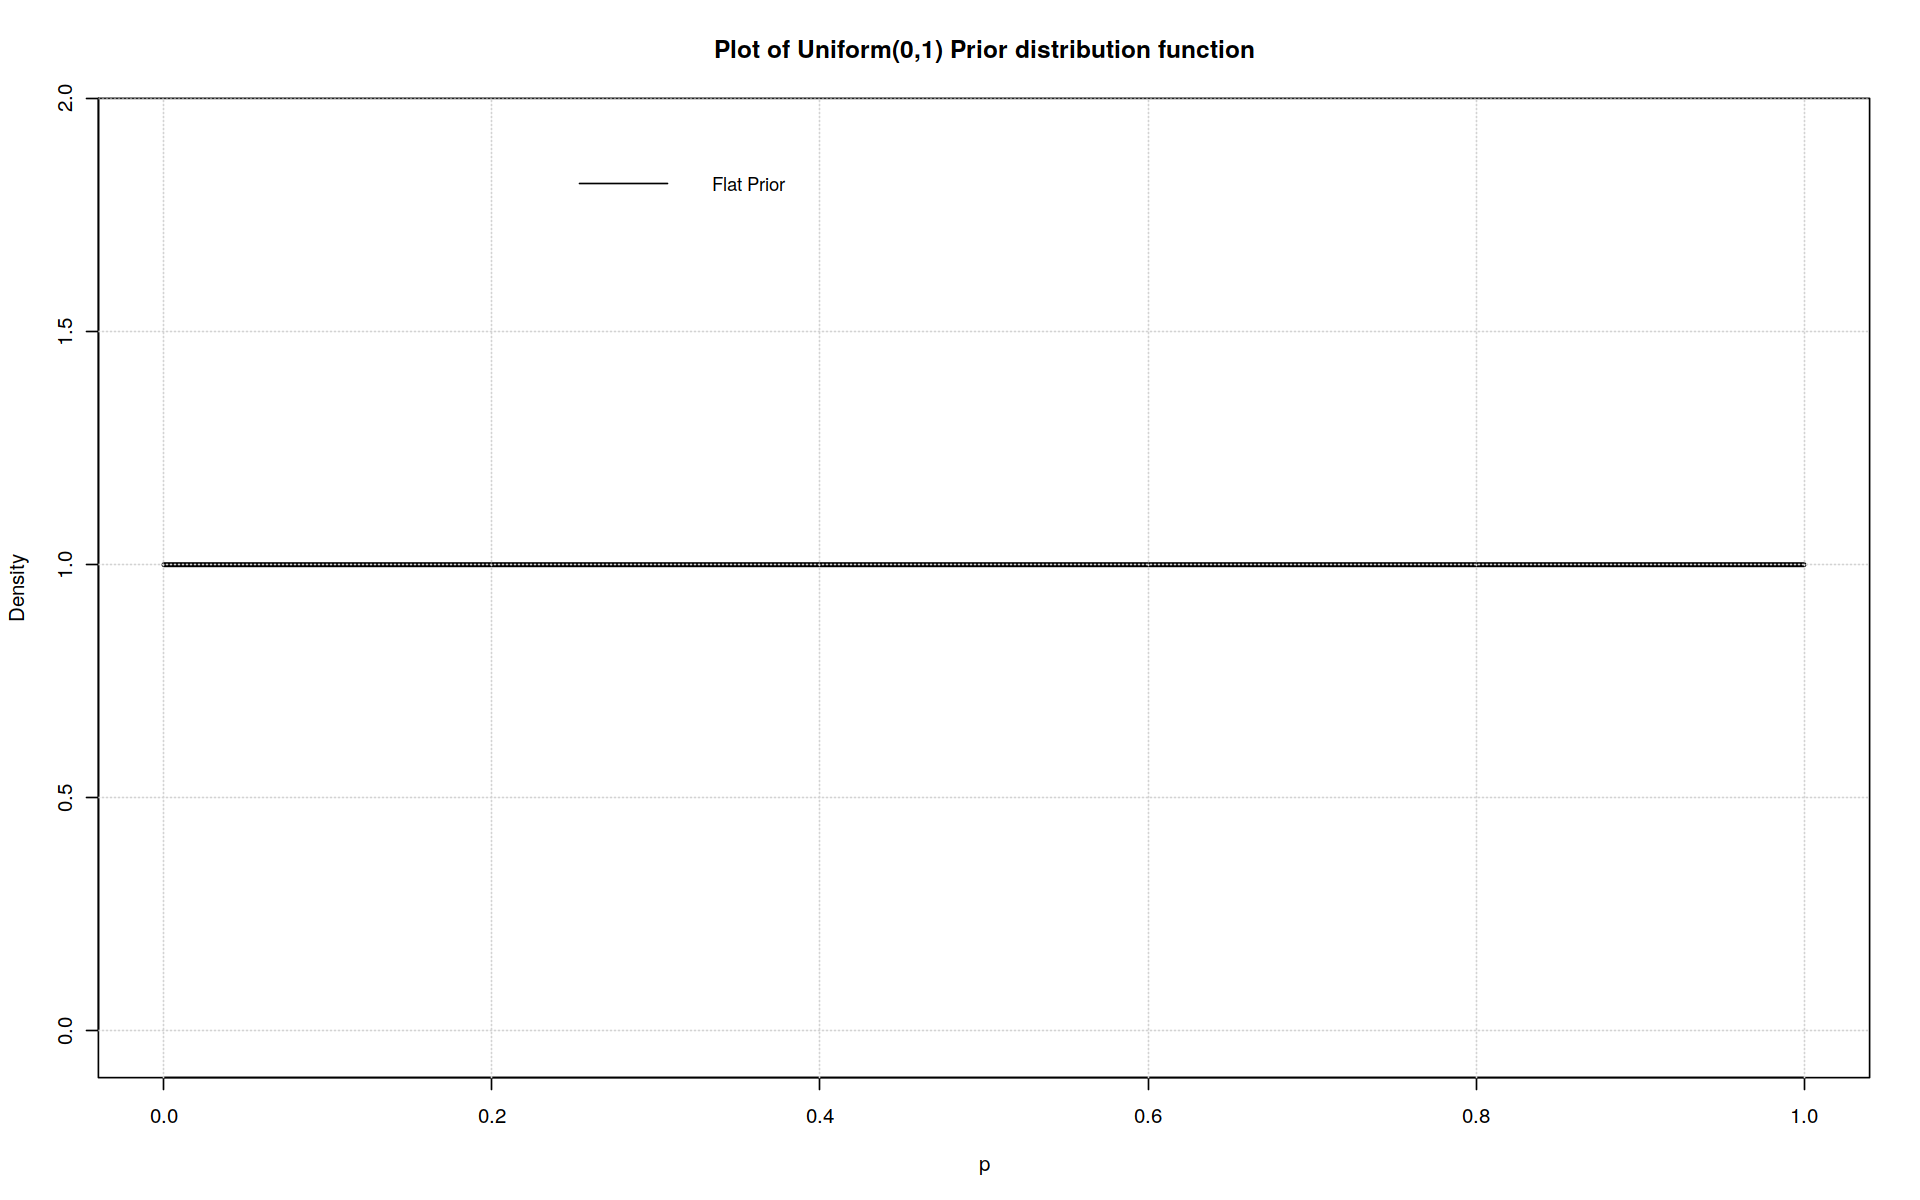

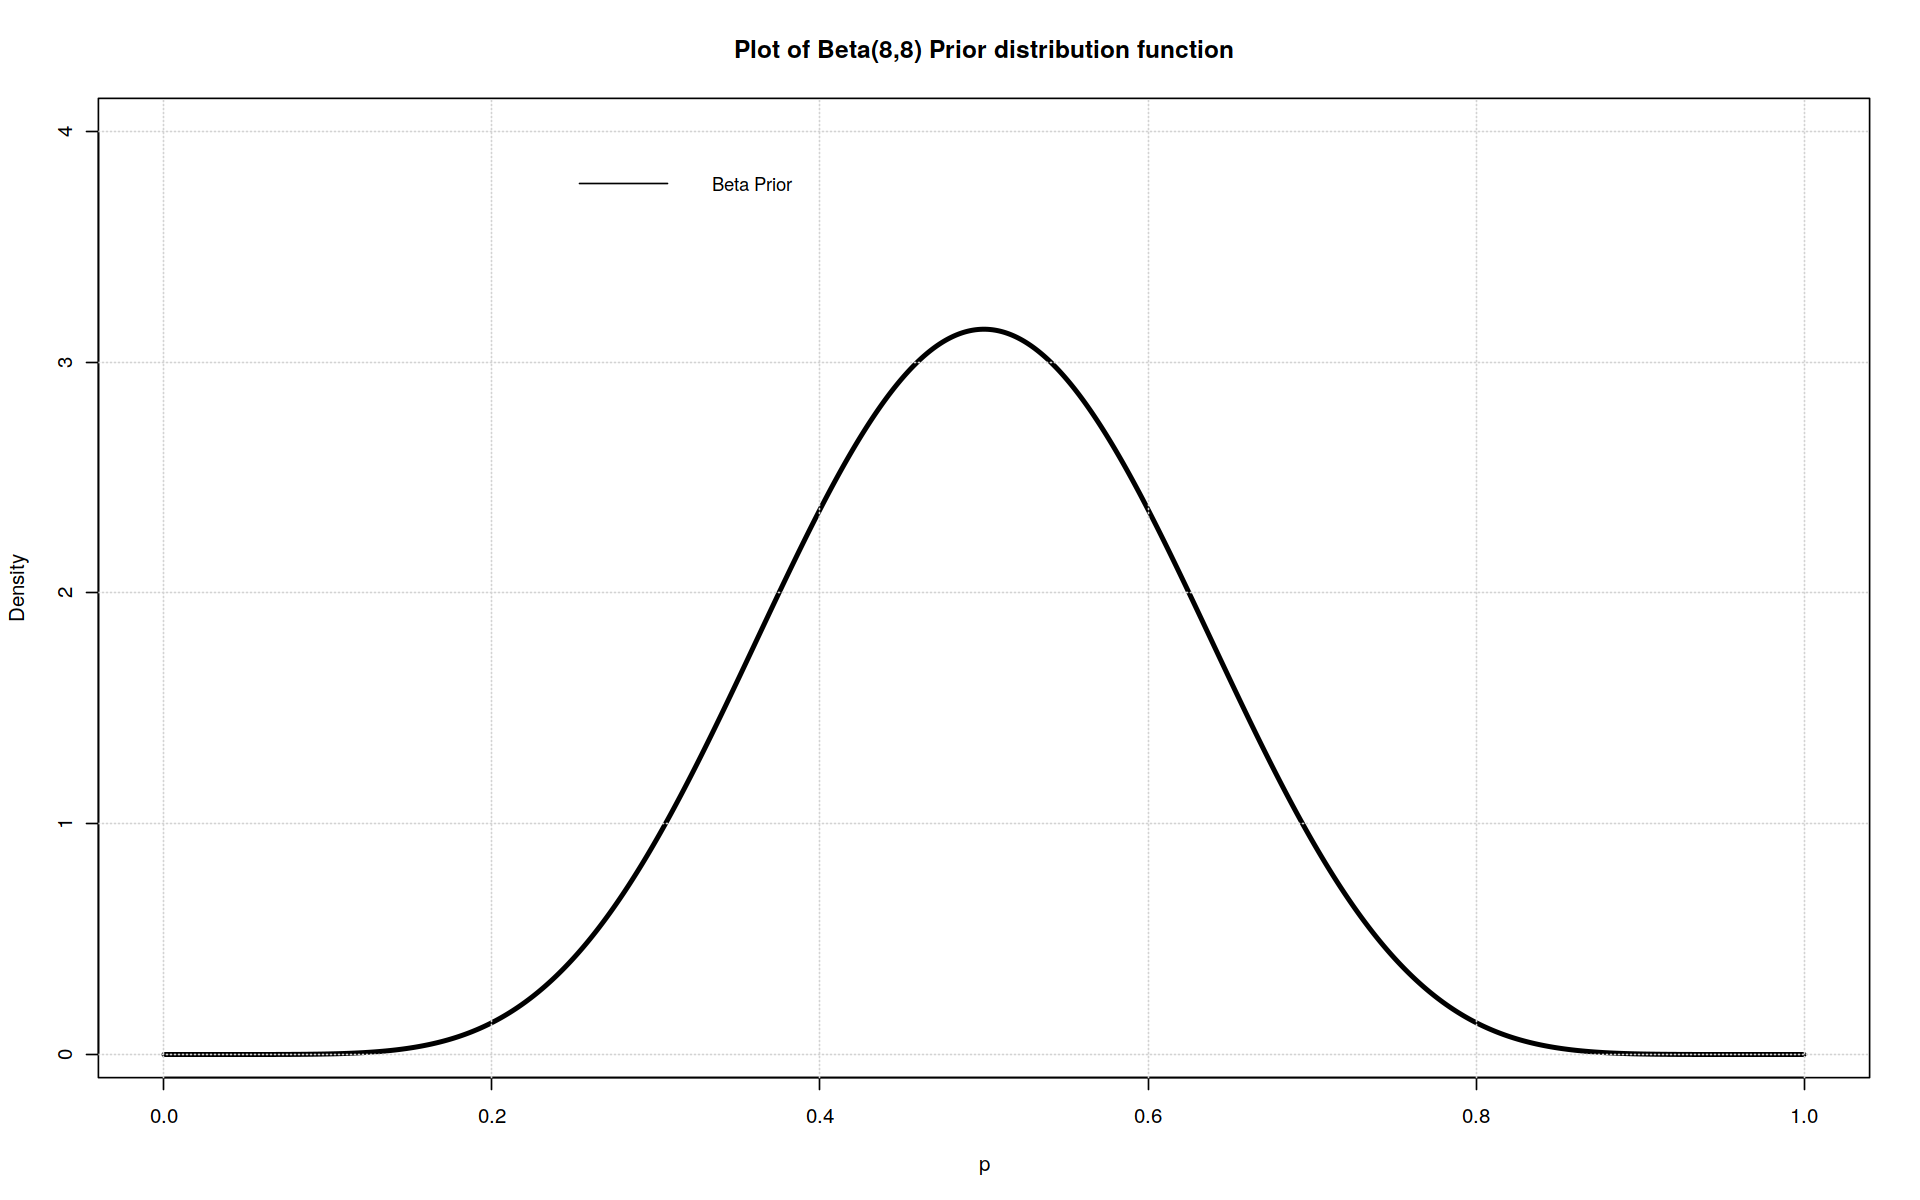

In [29]:
options(repr.plot.width=16, repr.plot.height=10)

plot(p, flat.prior, xaxs='r', yaxs='i', type='l', ylim=c(0-0.1,max(flat.prior)+1),
     main = "Plot of Uniform(0,1) Prior distribution function", lty=1, lwd = 3, xlab="p", 
     ylab='Density')
legend("topright", inset=0.05,legend=("Flat Prior"),  lty=1, cex=0.9,box.lty=0)
grid()

plot(p, beta.prior, xaxs='r', yaxs='i', type='l', ylim=c(0-0.1,max(beta.prior)+1),
     main = "Plot of Beta(8,8) Prior distribution function", lty=1, lwd = 3, xlab="p", 
     ylab='Density')
legend("topright", inset=0.05,legend=("Beta Prior"), lty=1, cex=0.9,box.lty=0)
grid()

In [30]:
# Flat posterior
p.star <- dbinom(x=r, size=n, prob=p)*flat.prior
flat.post <- p.star/(delta.p*sum(p.star))
# Beta Posterior 
beta.post <- dbeta(x=p, alpha+r, beta+n-r)

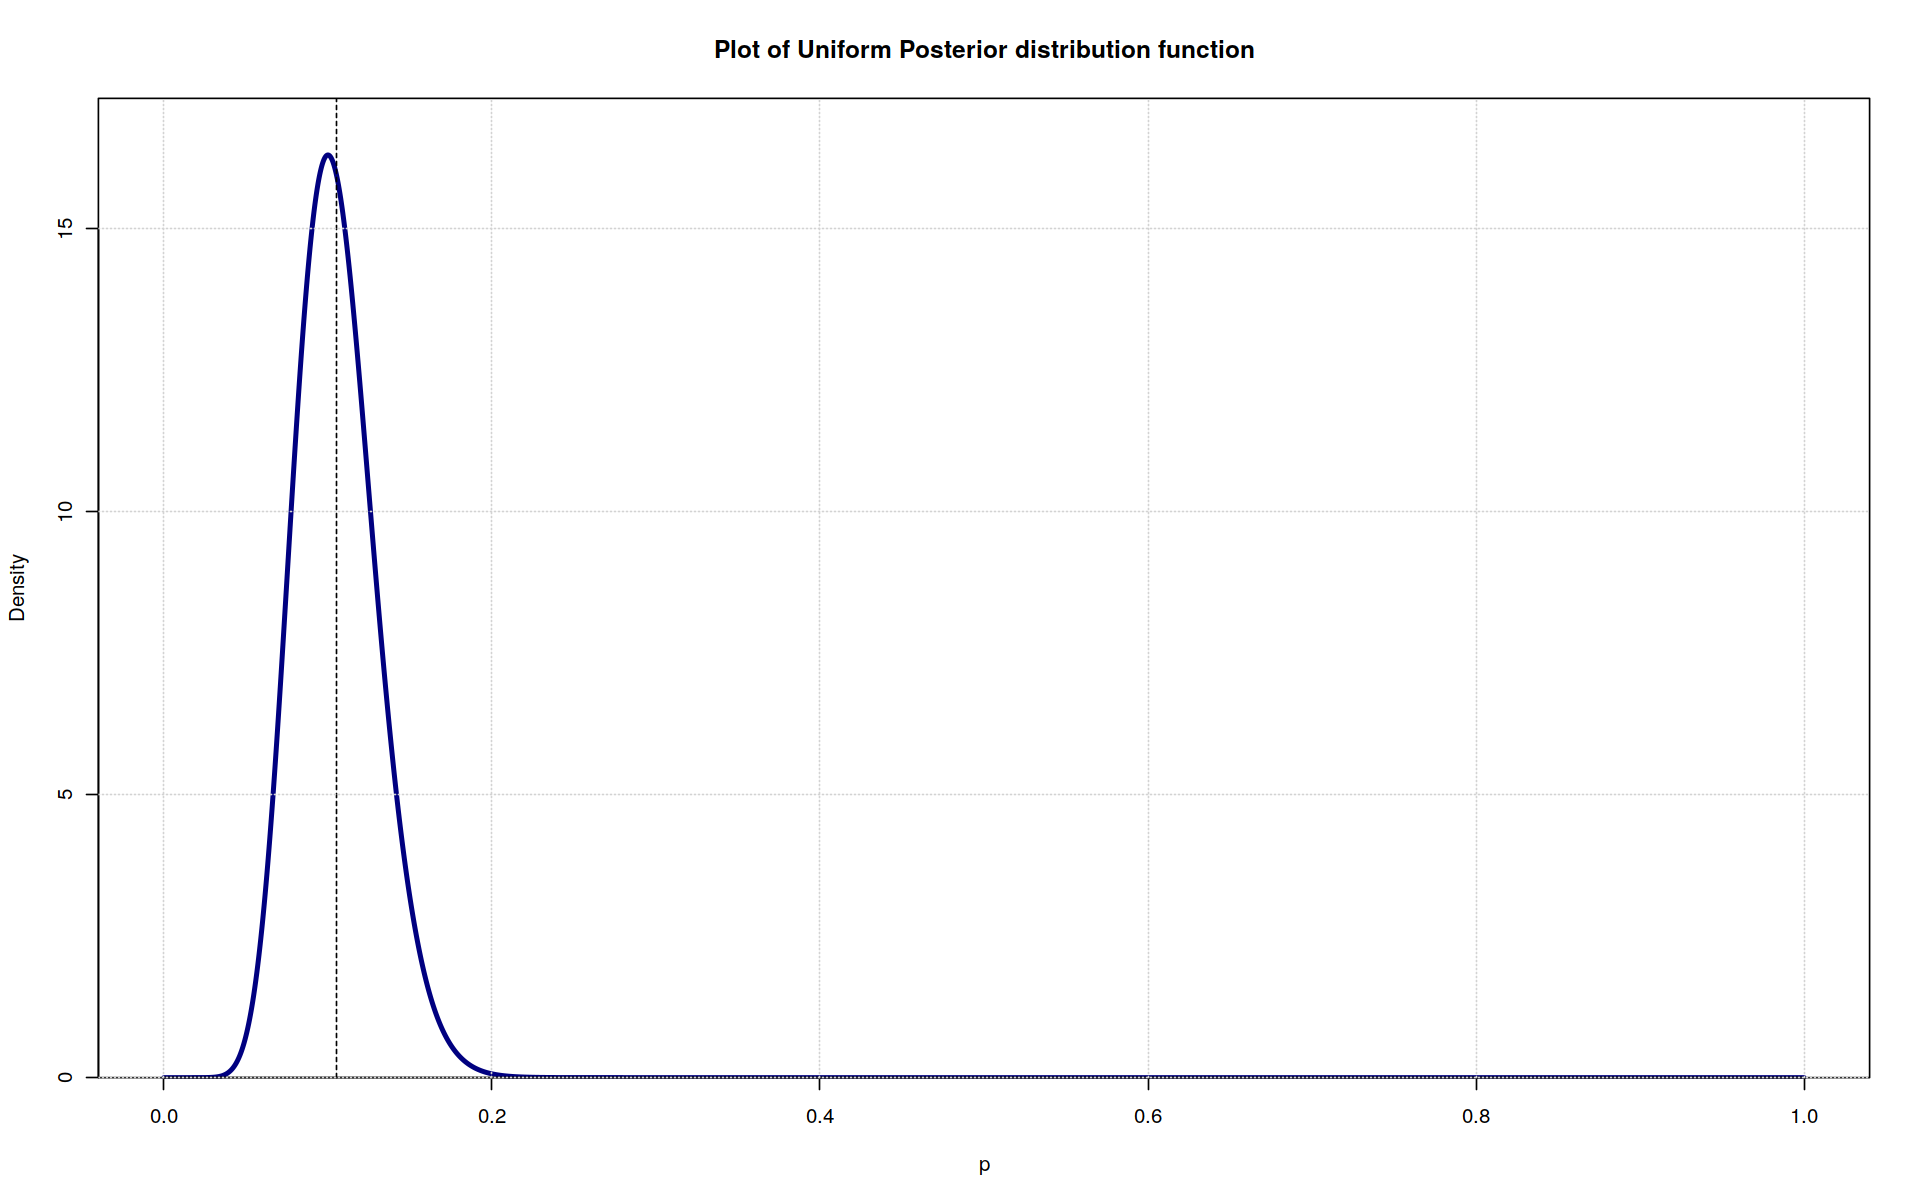

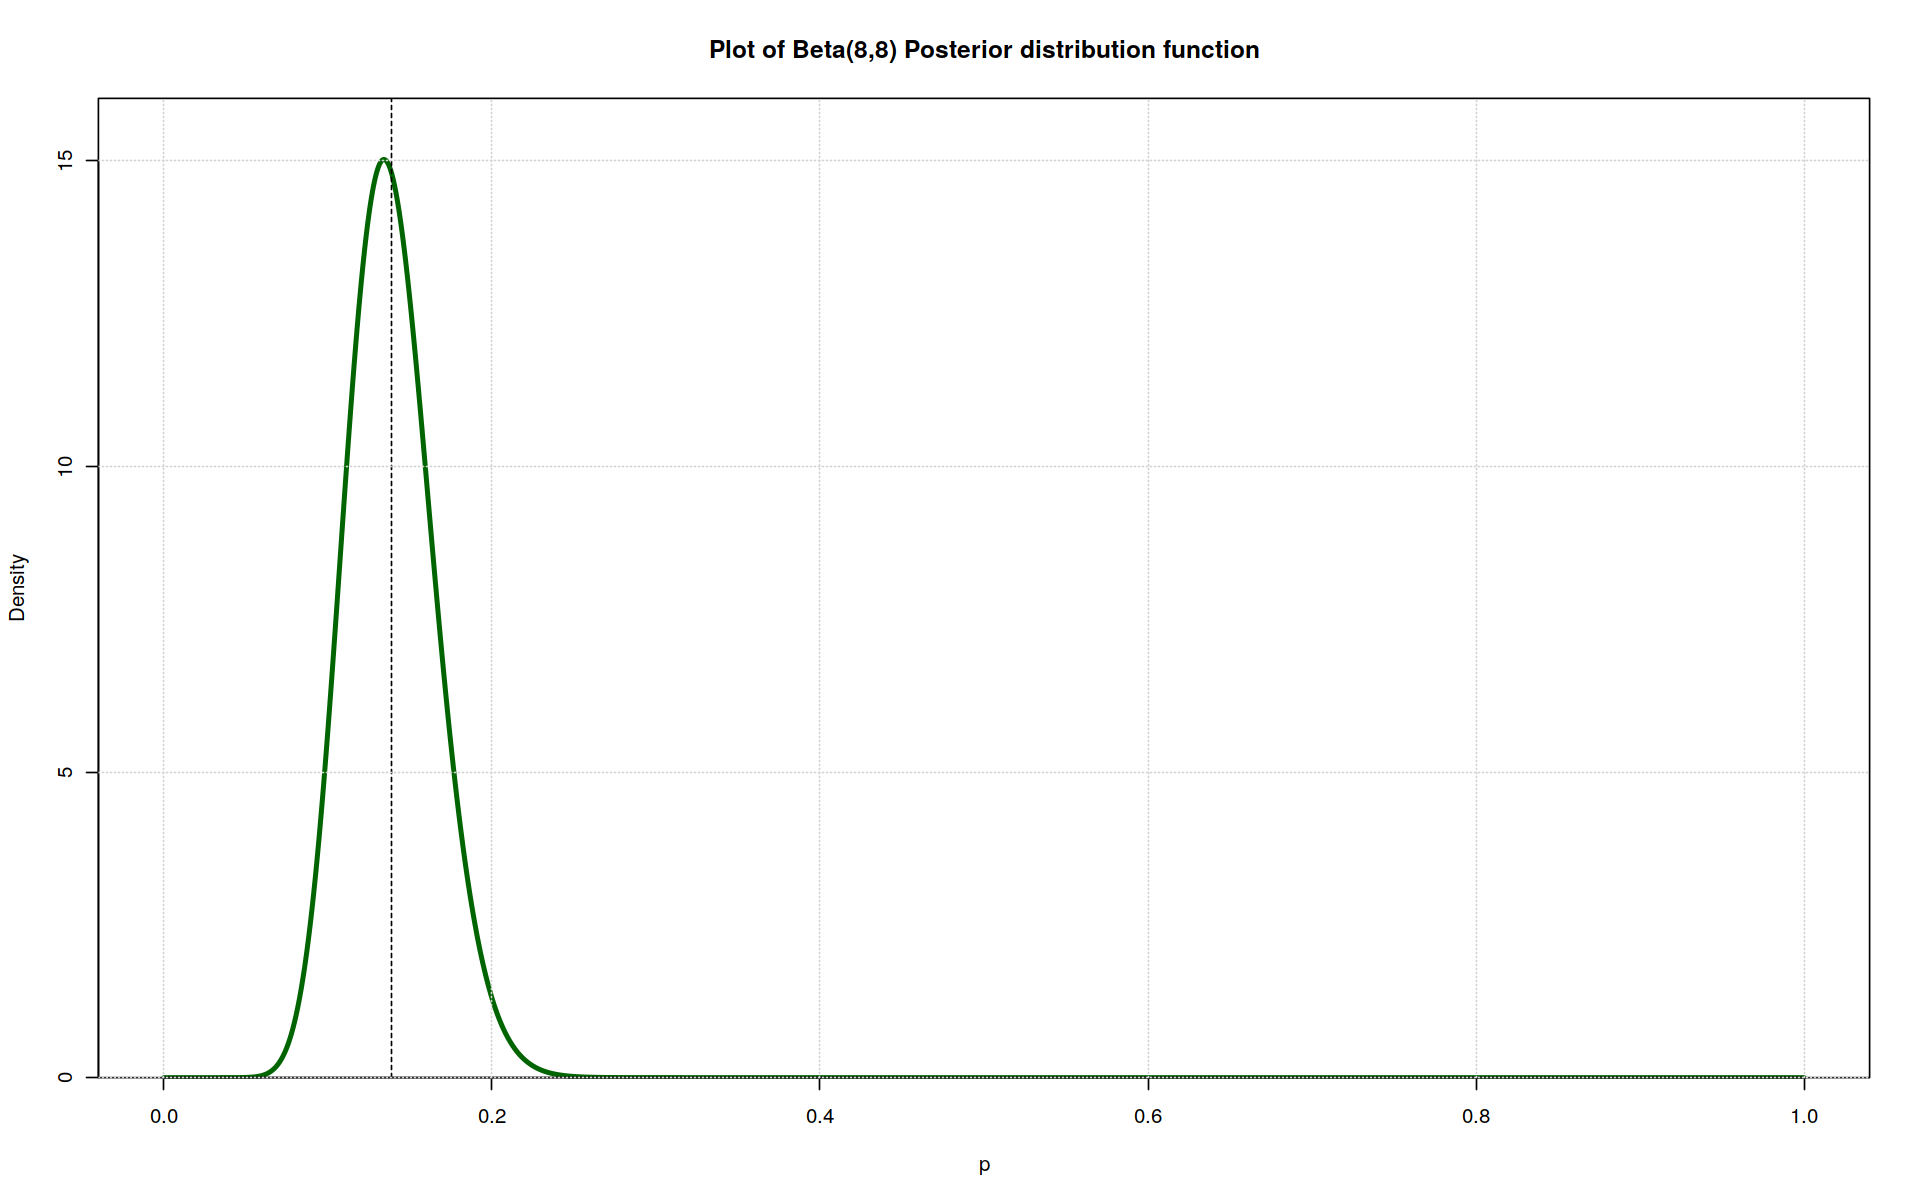

In [31]:


plot(p, flat.post, xaxs='r', yaxs='i', col='navy', type='l', ylim=c(0,max(flat.post)+1),
     main = "Plot of Uniform Posterior distribution function", lty=1, lwd = 3, xlab="p", 
     ylab='Density')

p.mean <- delta.p*sum(p*flat.post)
abline(v=p.mean, lty=2,col='black')
grid()

plot(p, beta.post, xaxs='r', yaxs='i', col='darkgreen', type='l', ylim=c(0,max(beta.post)+1),
     main = "Plot of Beta(8,8) Posterior distribution function", lty=1, lwd = 3, xlab="p", 
     ylab='Density')

p.mean <- delta.p*sum(p*beta.post)
abline(v=p.mean, lty=2,col='black')
grid()

In [32]:
max.flat  <- p[which.max(flat.post)]
max.beta <- p[which.max(beta.post)]

print(paste0("The most probable value of the Posterior for Flat Prior is: ", max.flat))
print(paste0("The most probable value of the Posterior for Beta Prior is: ", max.beta))

[1] "The most probable value of the Posterior for Flat Prior is: 0.10005"
[1] "The most probable value of the Posterior for Beta Prior is: 0.13415"


In [33]:
flat.area <- delta.p*cumsum(flat.post)
beta.area <- delta.p*cumsum(beta.post)
x.flat <- conf.level.func(p,flat.area,conf.level)
x.beta <- conf.level.func(p,beta.area,conf.level)
print(paste0("Beta's Prior Conf interval of 95%: [", x.flat[1],",", x.flat[2],"]"))
print(paste0("Flat's Prior Conf interval of 95%: [", x.beta[1],",", x.beta[2],"]"))

ERROR: Error in conf.level.func(p, flat.area, conf.level): non trovo la funzione "conf.level.func"


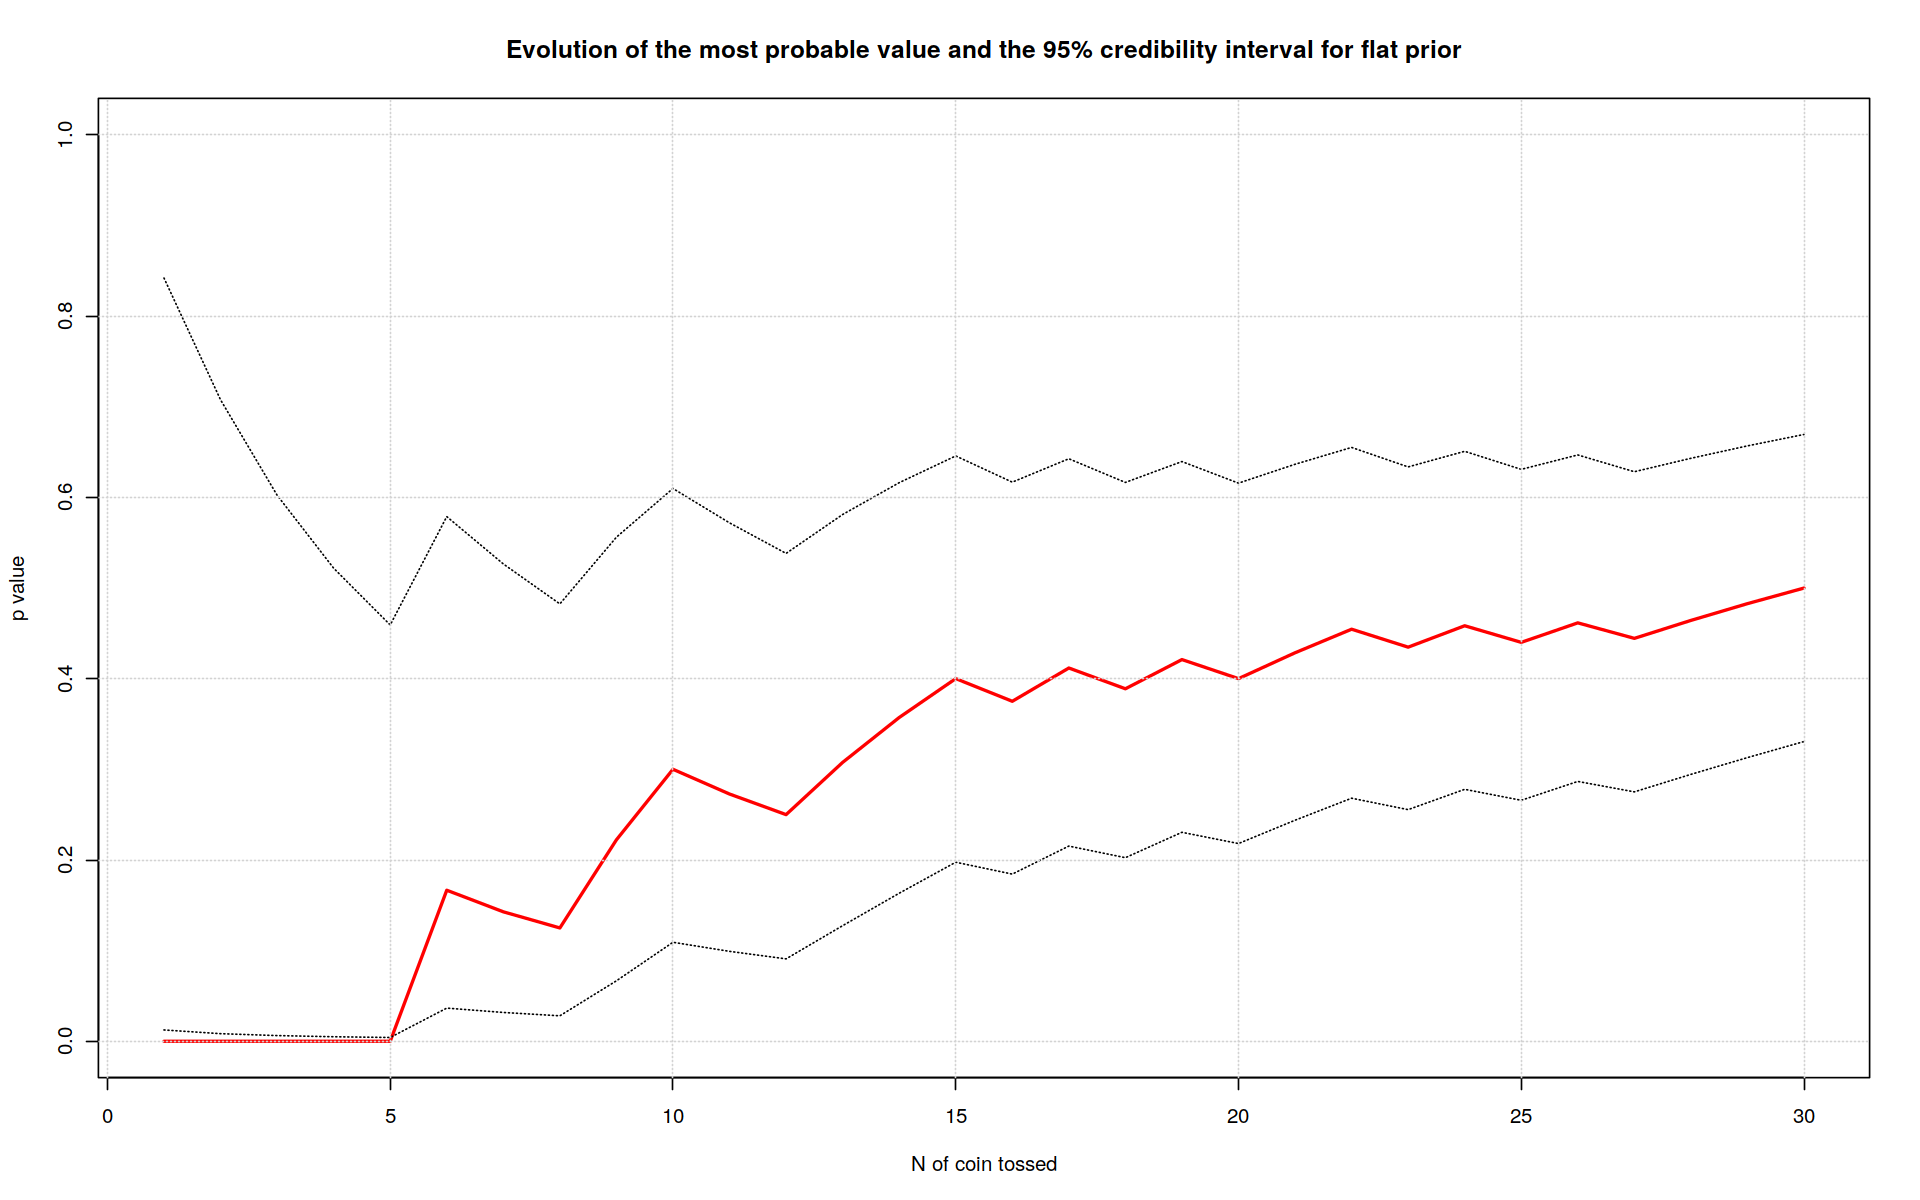

In [34]:
cred_interval_guessr <- function(post,space,interval=0.001){
    sum1 <- 0
    i    <- 0
    j    <- length(space)+1
    while (sum1<0.025){
        i <- i + 1
        sum1 <- sum1 + post[i]*interval
        }
    
    sum1 <- 0
    while (sum1<0.025 ){
        j <- j - 1
        sum1 <- sum1 + post[j]*interval
        
    }
    return(c(space[i],space[j]))
}
i <- 0
alpha <- 1
beta  <- 1
most_prob_evolution <- c()
upper_interval      <- c()
lower_interval      <- c()

for (coin in coin_t){
    i     <- i+1
    alpha <- alpha + coin
    beta  <- beta  + (-coin+1)
    
    post_Beta  <- dbeta(p,alpha,beta)
    
    most_prob_evolution[i] <- p[which.max(post_Beta)]
    
    interval          <- cred_interval_guessr(post_Beta,p,interval=dp)
    upper_interval[i] <- interval[2]
    lower_interval[i] <- interval[1]
                                     
}

plot(1:i,most_prob_evolution,type='l',
     xlab= 'N of coin tossed',ylab='p value',
     main = 'Evolution of the most probable value and the 95% credibility interval for flat prior',
    ylim = c(0,1),
    col='red',lwd=2
    )
lines(1:i,upper_interval,lty='dotted')
lines(1:i,lower_interval,lty='dotted')
grid()

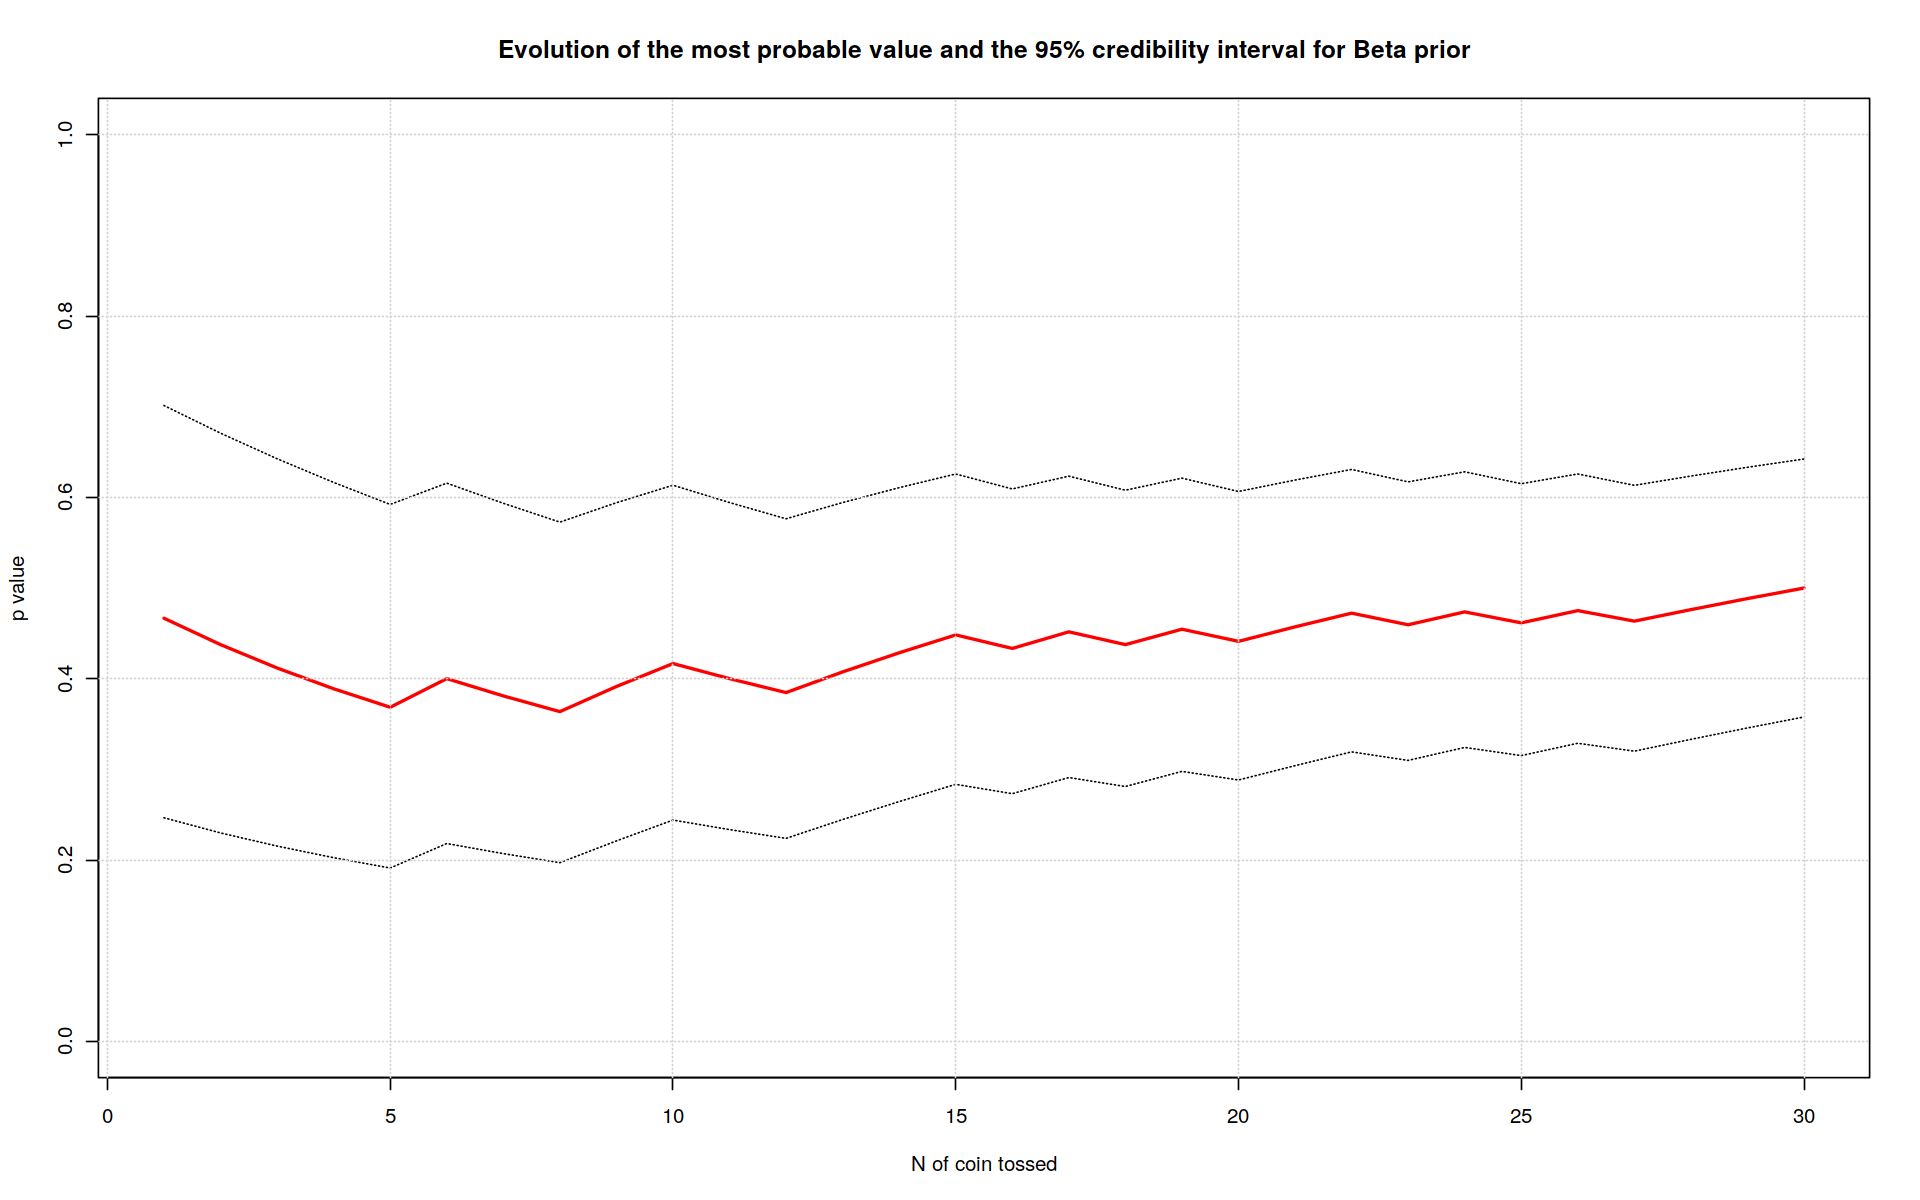

In [36]:
alpha <- 8
beta <- 8
i <- 0
most_prob_evolution <- c()
upper_interval      <- c()
lower_interval      <- c()

for (coin in coin_t){
    i     <- i+1
    alpha <- alpha + coin
    beta  <- beta  + (-coin+1)
    
    post_Beta  <- dbeta(p,alpha,beta)
    
    most_prob_evolution[i] <- p[which.max(post_Beta)]
    
    interval          <- cred_interval_guessr(post_Beta,p,interval=dp)
    upper_interval[i] <- interval[2]
    lower_interval[i] <- interval[1]
                                     
}

plot(1:i,most_prob_evolution,type='l',
     xlab= 'N of coin tossed',ylab='p value',
     main = 'Evolution of the most probable value and the 95% credibility interval for Beta prior',
    ylim = c(0,1),
    col='red',lwd=2
    )
lines(1:i,upper_interval,lty='dotted')
lines(1:i,lower_interval,lty='dotted')
grid()

**Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis
(i.e. considering all the data as a whole) ?**

We obtain the same result with the two methods as expected, because each toss is indipendet from the other.